In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree

In [126]:
ipl = pd.read_csv(r"C:\Users\abhay.jamwal\Downloads\matches.csv")
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [15]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [17]:
ipl[pd.isnull(ipl.winner)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [19]:
ipl.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [127]:
ipl.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SRH','MI','GL','RPS','RCB','KKR','DD',
                                                                            'KXIP','CSK','RR','DC','KTK','PW','RPS'],
            inplace = True)

In [128]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}

In [129]:
ipl.replace(encode,inplace=True)

In [130]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [36]:
ipl[pd.isna(ipl.city)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


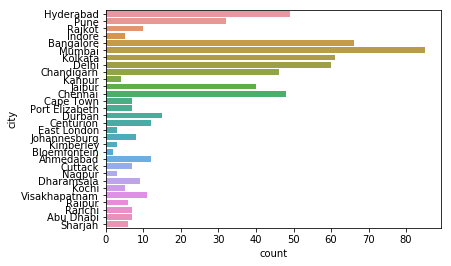

In [37]:
sns.countplot(y = ipl.city,data = ipl)

In [131]:
ipl.city.fillna('Jaipur',inplace = True)

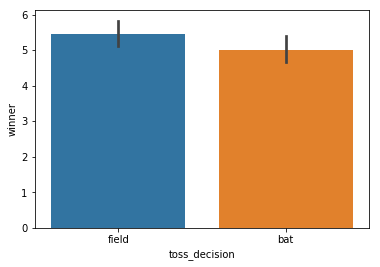

In [51]:
sns.barplot(x =ipl.toss_decision,y = ipl.winner,data = ipl )

In [132]:
temp1 = ipl.toss_winner.value_counts()
temp2 = ipl.winner.value_counts()


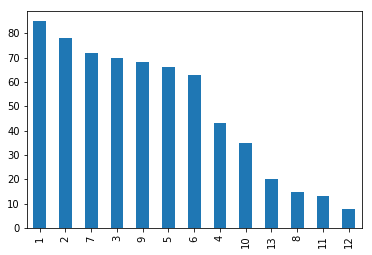

In [58]:
temp1.plot(kind = 'bar')
plt.show()

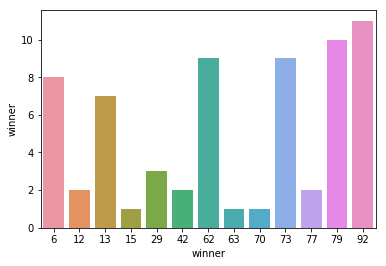

In [66]:
sns.barplot(x = temp2,y = ipl.winner,data = ipl)

In [162]:
ipl.winner.iloc[300]

14

In [161]:
a = [300,545,570]
for i in a:
    if ipl.winner.iloc[i] == 'Draw':
        ipl.winner.iloc[i] = 14

C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [157]:
ipl.winner.fillna('Draw',inplace = True )

In [141]:
ipl.isna().sum()

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           3
dtype: int64

In [133]:
ipl = ipl[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
ipl.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3


In [139]:
from sklearn.preprocessing import LabelEncoder
var = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var:
    ipl[i] = le.fit_transform(ipl[i])
ipl.dtypes

team1             int64
team2             int64
city              int64
toss_decision     int32
toss_winner       int64
venue             int64
winner           object
dtype: object

In [163]:
ipl.winner = ipl.winner.astype('int32')

In [165]:
ipl.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,13,1,2,23,10
1,1,11,24,1,10,16,11
2,8,2,26,1,1,25,2
3,11,9,14,1,8,11,9
4,3,7,2,0,2,14,3


In [134]:
a = [300, 545, 570]
for i in a:
     if ipl.winner.iloc[i] == 'Draw':
            ipl.winner.iloc[i] = 14

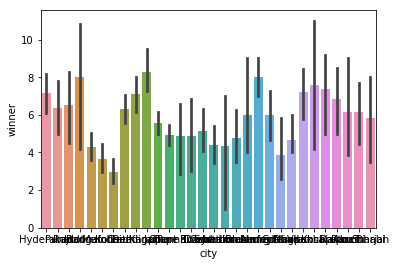

In [104]:
sns.barplot(x = ipl.city, y = ipl.winner, data = ipl)

In [135]:
# ipl = pd.get_dummies(ipl,columns=['city','toss_decision','venue'],drop_first=True)


In [167]:
X = ipl.drop(labels=['winner'],axis =1)
y = ipl.winner


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)


In [121]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=5, random_state=42)
clf.fit(X_train,y_train)

In [124]:
accuracy = clf.score(X_test,y_test)
accuracy

0.28125

In [171]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [172]:
accuracy = model.score(X_test,y_test)
accuracy

0.46875

In [179]:
from sklearn import metrics
def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    prediction = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(prediction,data[outcome])
    print(accuracy)
    

In [196]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
outcome = ['winner']
predictors = ['team1','team2','toss_winner','city','toss_decision']
model = RandomForestClassifier(n_estimators=150)
classification_model(model,ipl,predictors,outcome)

C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8836477987421384


In [198]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,make_scorer
p_grid = {'n_estimaters : [10,100,150,200],max_features': [5, 10, 20, 30]}
gridcv = GridSearchCV(RandomForestClassifier,p_grid,cv = 5,scoring = make_scorer(accuracy_score))
print(gridcv)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<class 'sklearn.ensemble.forest.RandomForestClassifier'>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimaters : [10,100,150,200],max_features': [5, 10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)


In [213]:
importance = model.feature_importances_
print(importance,list(predictors))

[0.24633608 0.27209645 0.18144625 0.26855036 0.03157087] ['team1', 'team2', 'toss_winner', 'city', 'toss_decision']


In [217]:
feat_imp = pd.Series(importance,index=predictors).sort_values(ascending=False)
feat_imp

team2            0.272096
city             0.268550
team1            0.246336
toss_winner      0.181446
toss_decision    0.031571
dtype: float64

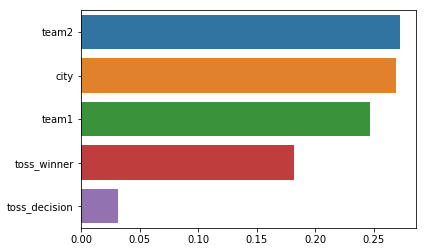

In [219]:
sns.barplot(x = feat_imp,y= feat_imp.index)

In [222]:
outcome = ['winner']
predictors2 = ['team1','team2','toss_winner','city']
classification_model(model,ipl,predictors2,outcome)

C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8380503144654088
